### LITTLE EYES V2
#### Meu Segundo Modelo de Visão Computacional

In [1]:
the_seed = 32
digit_size = (28, 28, 1)
convnn_activation = 'relu'
fully_connected_activation = 'tanh'
hyperparameter_max = 10
learning_rate = 0.001
max_epochs = 20
score_metric = 'accuracy'
verbose = 1

In [2]:
import tensorflow
from tensorflow.keras import datasets, models, layers, optimizers, Input, Model
from matplotlib import pyplot
import numpy
import pandas
import random

In [ ]:
random.seed(the_seed)
numpy.random.seed(the_seed)
tensorflow.random.set_seed(the_seed)

In [3]:
def create_little_eyes(digit_size : tuple[int, int, int] = (28, 28, 1),
                       convnn_activation : str = 'relu',
                       fully_connected_activation : str = 'tanh',
                       net_name : str = 'LittleEyes',
                       hyperparameter : int = 1):
    # CAMADA DE ENTRADA
    inputs = Input(shape=digit_size)

    # PRIMEIRA CAMADA CONVOLUCIONAL
    conv_2d_layer_1 = layers.Conv2D(2*hyperparameter, (3, 3), activation=convnn_activation)
    x = conv_2d_layer_1(inputs)

    # PRIMEIRA CAMADA MAX POOLING
    maxpool_1 = layers.MaxPooling2D((2, 2))
    x = maxpool_1(x)

    # SEGUNDA CAMADA CONVOLUCIONAL
    conv_2d_layer_2 = layers.Conv2D(4*hyperparameter, (3, 3), activation=convnn_activation)
    x = conv_2d_layer_2(x)

    # SEGUNDA CAMADA MAX POOLING
    maxpool_2 = layers.MaxPooling2D((2, 2))
    x = maxpool_2(x)

    # TERCEIRA CAMADA CONVOLUCIONAL
    conv_2d_layer_3 = layers.Conv2D(4*hyperparameter, (3, 3), activation=convnn_activation)
    x = conv_2d_layer_3(x)

    # TERCEIRA CAMADA MAX POOLING
    maxpool_3 = layers.MaxPooling2D((2, 2))
    x = maxpool_3(x)

    # FLATTEN
    flatten_layer = layers.Flatten()
    x = flatten_layer(x)

    # FULLY CONNECTED HIDDEN LAYER
    hidden_layer = layers.Dense(hyperparameter + 1, activation=fully_connected_activation)
    x = hidden_layer(x)

    # OUTPUT LAYER
    output_layer = layers.Dense(10)
    outputs = output_layer(x)

    return Model(inputs=inputs, outputs=outputs, name=net_name)

In [4]:
(train_images, train_labels), (validation_images, validation_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, validation_images = train_images / 255.0, validation_images / 255.0

In [5]:
result_list = []
for hyperparameter in numpy.arange(1, hyperparameter_max+1):
    net_name = f"LittleEyes_{hyperparameter}"
    print(f"{net_name} training started...")
    little_eyes = create_little_eyes(net_name = net_name,
                                     hyperparameter=hyperparameter)
    opt = optimizers.Adam(learning_rate=learning_rate)
    little_eyes.compile(optimizer=opt,
                loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[score_metric])

    history = little_eyes.fit(train_images, train_labels, epochs=max_epochs, 
                              validation_data=(validation_images, validation_labels),
                              verbose=verbose)
    
    training_score = history.history[score_metric][-1]
    validation_score = history.history[f"val_{score_metric}"][-1]
    result_list.append((net_name, hyperparameter, training_score, validation_score, little_eyes))
    print(f"{net_name.upper()}: {100*training_score:.0f}% TRAINING {score_metric.upper()} / {100*validation_score:.0f}% VALIDATION {score_metric.upper()}")

LittleEyes_1 training started...
Epoch 1/20
1875/1875 [==============================] - 17s 8ms/step - loss: 1.7731 - accuracy: 0.3284 - val_loss: 1.4389 - val_accuracy: 0.4274
Epoch 2/20
1875/1875 [==============================] - 15s 8ms/step - loss: 1.3495 - accuracy: 0.4514 - val_loss: 1.2821 - val_accuracy: 0.4565
Epoch 3/20
1875/1875 [==============================] - 15s 8ms/step - loss: 1.2438 - accuracy: 0.4976 - val_loss: 1.2092 - val_accuracy: 0.5175
Epoch 4/20
1875/1875 [==============================] - 15s 8ms/step - loss: 1.1813 - accuracy: 0.5511 - val_loss: 1.1760 - val_accuracy: 0.5714
Epoch 5/20
1875/1875 [==============================] - 14s 8ms/step - loss: 1.1308 - accuracy: 0.5825 - val_loss: 1.1109 - val_accuracy: 0.5994
Epoch 6/20
1875/1875 [==============================] - 14s 8ms/step - loss: 1.0866 - accuracy: 0.6056 - val_loss: 1.0868 - val_accuracy: 0.6051
Epoch 7/20
1875/1875 [==============================] - 14s 7ms/step - loss: 1.0504 - accuracy: 0

In [6]:
results = pandas.DataFrame.from_records(result_list)
results.columns = ["net_name", "hyperparameter", score_metric, f"val_{score_metric}", "little_eyes"]
results.sort_values("val_accuracy", ascending=False)

,net_name,hyperparameter,accuracy,val_accuracy,little_eyes
9,LittleEyes_10,10,0.997383,0.9878,<keras.engine.functional.Functional object at ...
6,LittleEyes_7,7,0.994900,0.9853,<keras.engine.functional.Functional object at ...
7,LittleEyes_8,8,0.995667,0.9841,<keras.engine.functional.Functional object at ...
8,LittleEyes_9,9,0.996500,0.9819,<keras.engine.functional.Functional object at ...
4,LittleEyes_5,5,0.987233,0.9800,<keras.engine.functional.Functional object at ...
5,LittleEyes_6,6,0.991967,0.9798,<keras.engine.functional.Functional object at ...
3,LittleEyes_4,4,0.979983,0.9762,<keras.engine.functional.Functional object at ...
2,LittleEyes_3,3,0.969167,0.9694,<keras.engine.functional.Functional object at ...
1,LittleEyes_2,2,0.924450,0.9264,<keras.engine.functional.Functional object at ...
0,LittleEyes_1,1,0.704317,0.7120,<keras.engine.functional.Functional object at ...


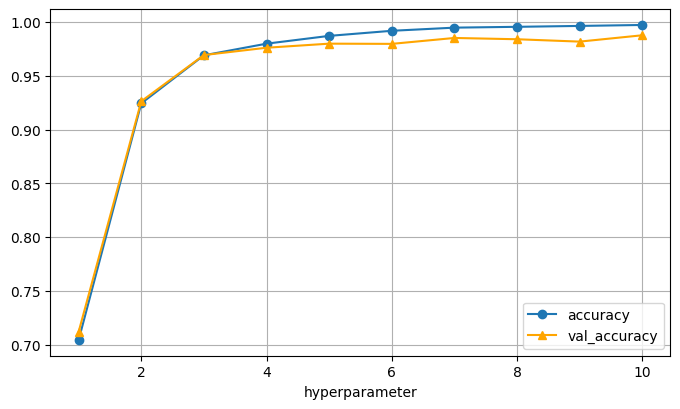

In [7]:
fig = pyplot.figure(figsize=(8, 4.5))
ax = fig.add_subplot(111)
results.plot(x="hyperparameter", y="accuracy", marker='o', ax=ax)
results.plot(x="hyperparameter", y="val_accuracy", marker='^', color="orange", ax=ax)
ax.grid()